In [8]:
import fusionsc as fsc
from fusionsc.devices import w7x
import numpy as np
import matplotlib

In [2]:
config = w7x.standard().compute(w7x.defaultGrid())
await config

In [3]:
mapping = w7x.computeMapping(config, toroidalSymmetry = 5)
await mapping

In [6]:
mapping = fsc.flt.computeMapping(
    config,
    
    mappingPlanes = [np.radians(36)],
    toroidalSymmetry = 5,
    
    r = np.linspace(4.2, 7, 400),
    z = np.linspace(-1.5, 1.5, 400),
    
    stepSize = 0.02, distanceLimit = 0,
    
    targetError = 1e-3, errorEstimationDistance = 1e4, minStepSize = 1e-3
)
await mapping

In [4]:
baseGeo = w7x.op21Geometry().triangulate(maxEdgeLength = 0.03).index(w7x.defaultGeometryGrid())
gm = mapping.mapGeometry(baseGeo, nPhi = 32, nU = 100, nV = 100, toroidalSymmetry = 5)

In [5]:
gm.getSection(4).rotate(np.radians(-90), [1,0,0]).asPyvista().plot(notebook=False)

In [32]:
geo.writePly("view.ply")

AttributeError: 'Geometry' object has no attribute 'writePly'

In [35]:
geo.rotate(np.radians(-90), [1,0,0]).exportTo("divertor.ply")

In [9]:
r = np.linspace(4.5, 4.75, 50)
z = np.linspace(-0.4, 0.4, 80)

rg, zg = np.meshgrid(r, z, indexing = 'ij')
xg = -rg
yg = 0 * rg

def calc_len(factor):
    return fsc.flt.connectionLength([xg, yg, zg], config * factor, baseGeo, mapping = mapping, grid = w7x.defaultGrid(), distanceLimit = 1e3, stepSize = 0.1)

import time
start = time.time()
lc = calc_len(1) + calc_len(-1)
end = time.time()
print(end - start)

192.79149985313416


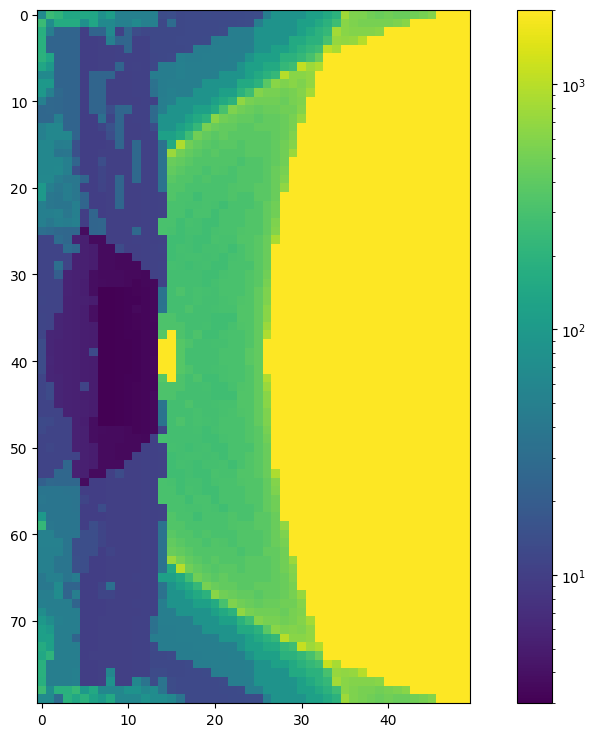

In [11]:
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 9))
plt.imshow(lc.T, norm = LogNorm())
plt.colorbar()

In [11]:
r = np.linspace(4.5, 6.25, 700)
z = np.linspace(-1, 1, 800)

rg, zg = np.meshgrid(r, z, indexing = 'ij')
xg = -rg
yg = 0 * rg

def calc_len(direction):
    return fsc.flt.connectionLength([xg, yg, zg], config, baseGeo, mapping = gm, distanceLimit = 1e3, stepSize = 13, direction = direction)

import time
start = time.time()
lc = calc_len('forward') + calc_len('backward')
end = time.time()
print(end - start)

693.698765039444


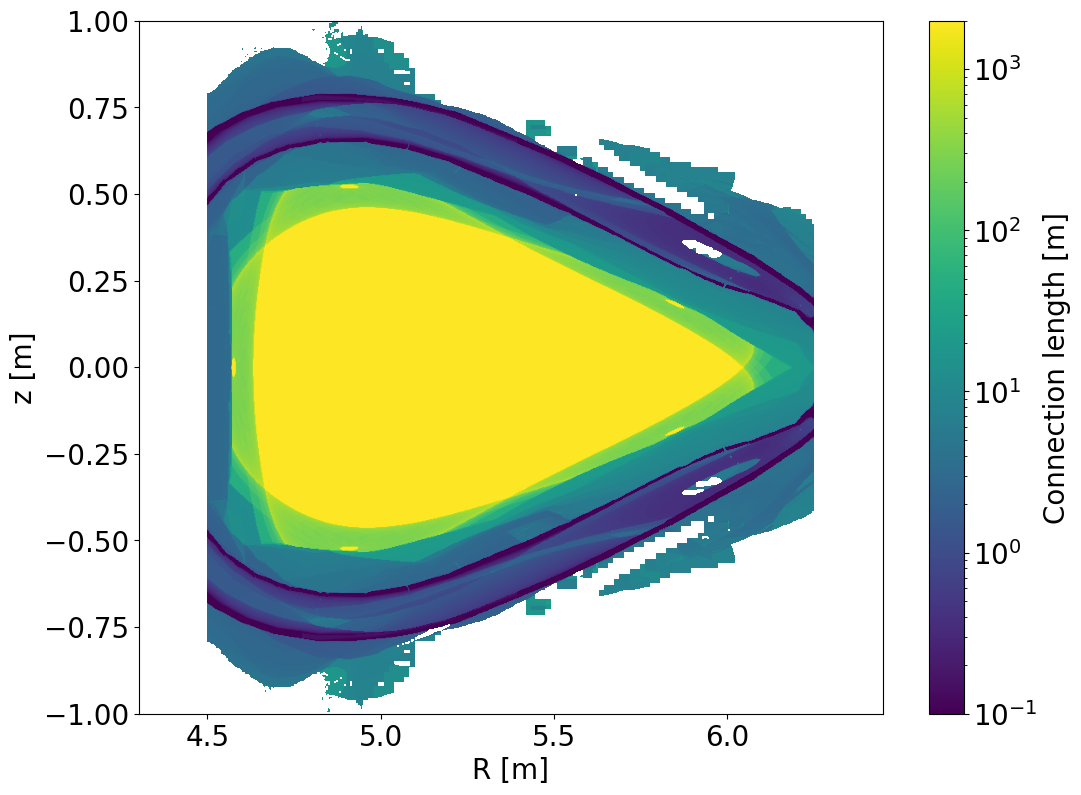

In [12]:
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 9))
matplotlib.rc('font', size = 20)
plt.imshow(lc.T, norm = LogNorm(vmin = 0.1, vmax = 2e3), extent = [min(r), max(r), min(z), max(z)])
plt.axis('equal')
plt.xlabel('R [m]')
plt.ylabel('z [m]')
plt.colorbar(label = 'Connection length [m]')

In [12]:
rStart = np.linspace(4.4, 4.7, 20)
phi = np.radians(72 * 0 + 36)
xStart = np.cos(phi) * rStart
yStart = np.sin(phi) * rStart
zStart = 0 * rStart

pStart = [xStart, yStart, zStart]
#xStart = np.linspace([5.5, 0, 0], [5.8, 0, 0], 40, axis = 1)

pc = fsc.flt.poincareInPhiPlanes(pStart, config, [0, np.pi, np.radians(200.8)], 2000, distanceLimit = 1e7, stepSize = 13, mapping = gm, geometry = baseGeo)

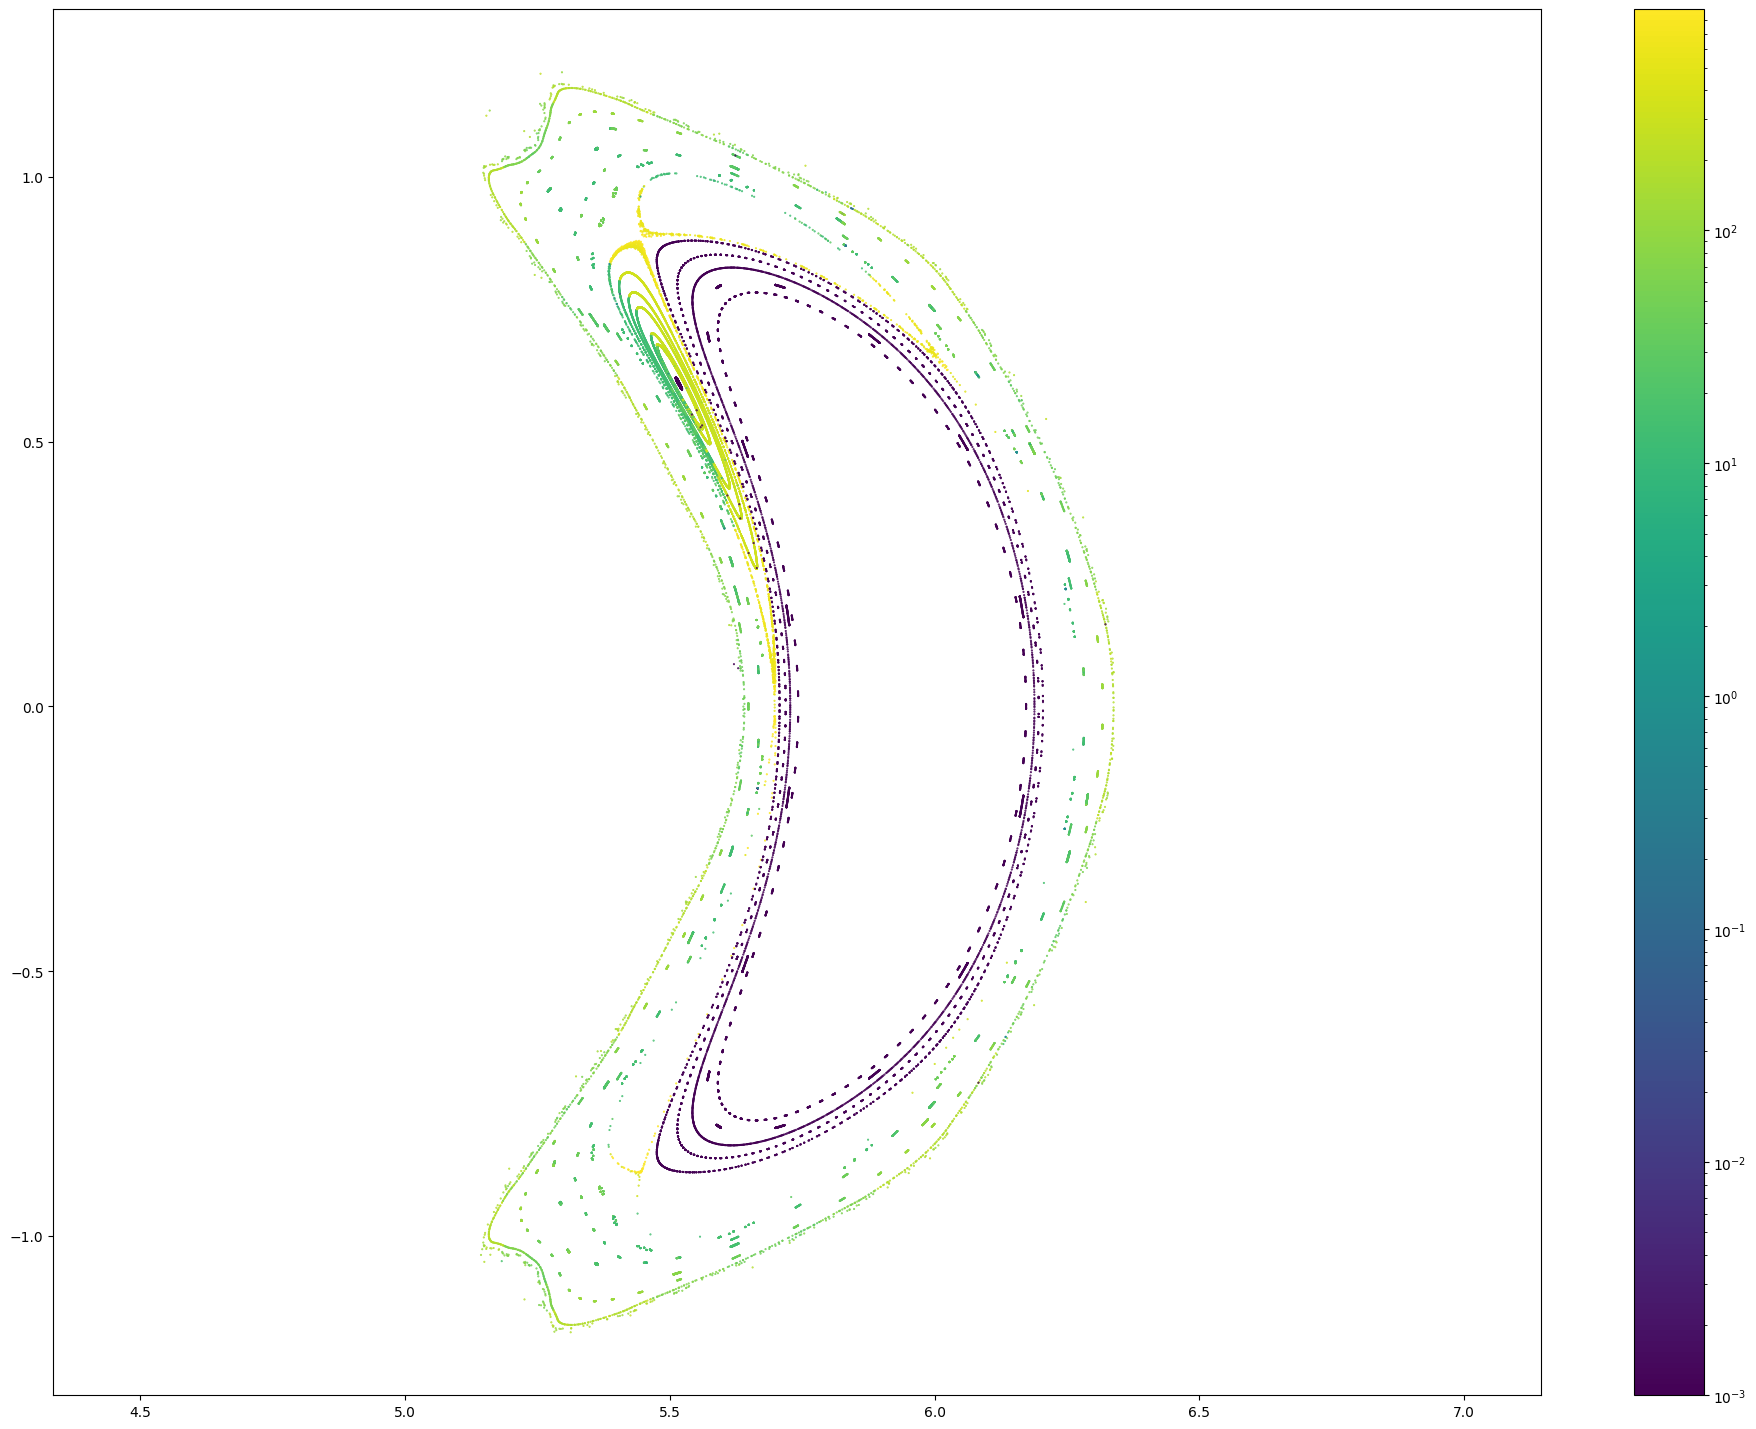

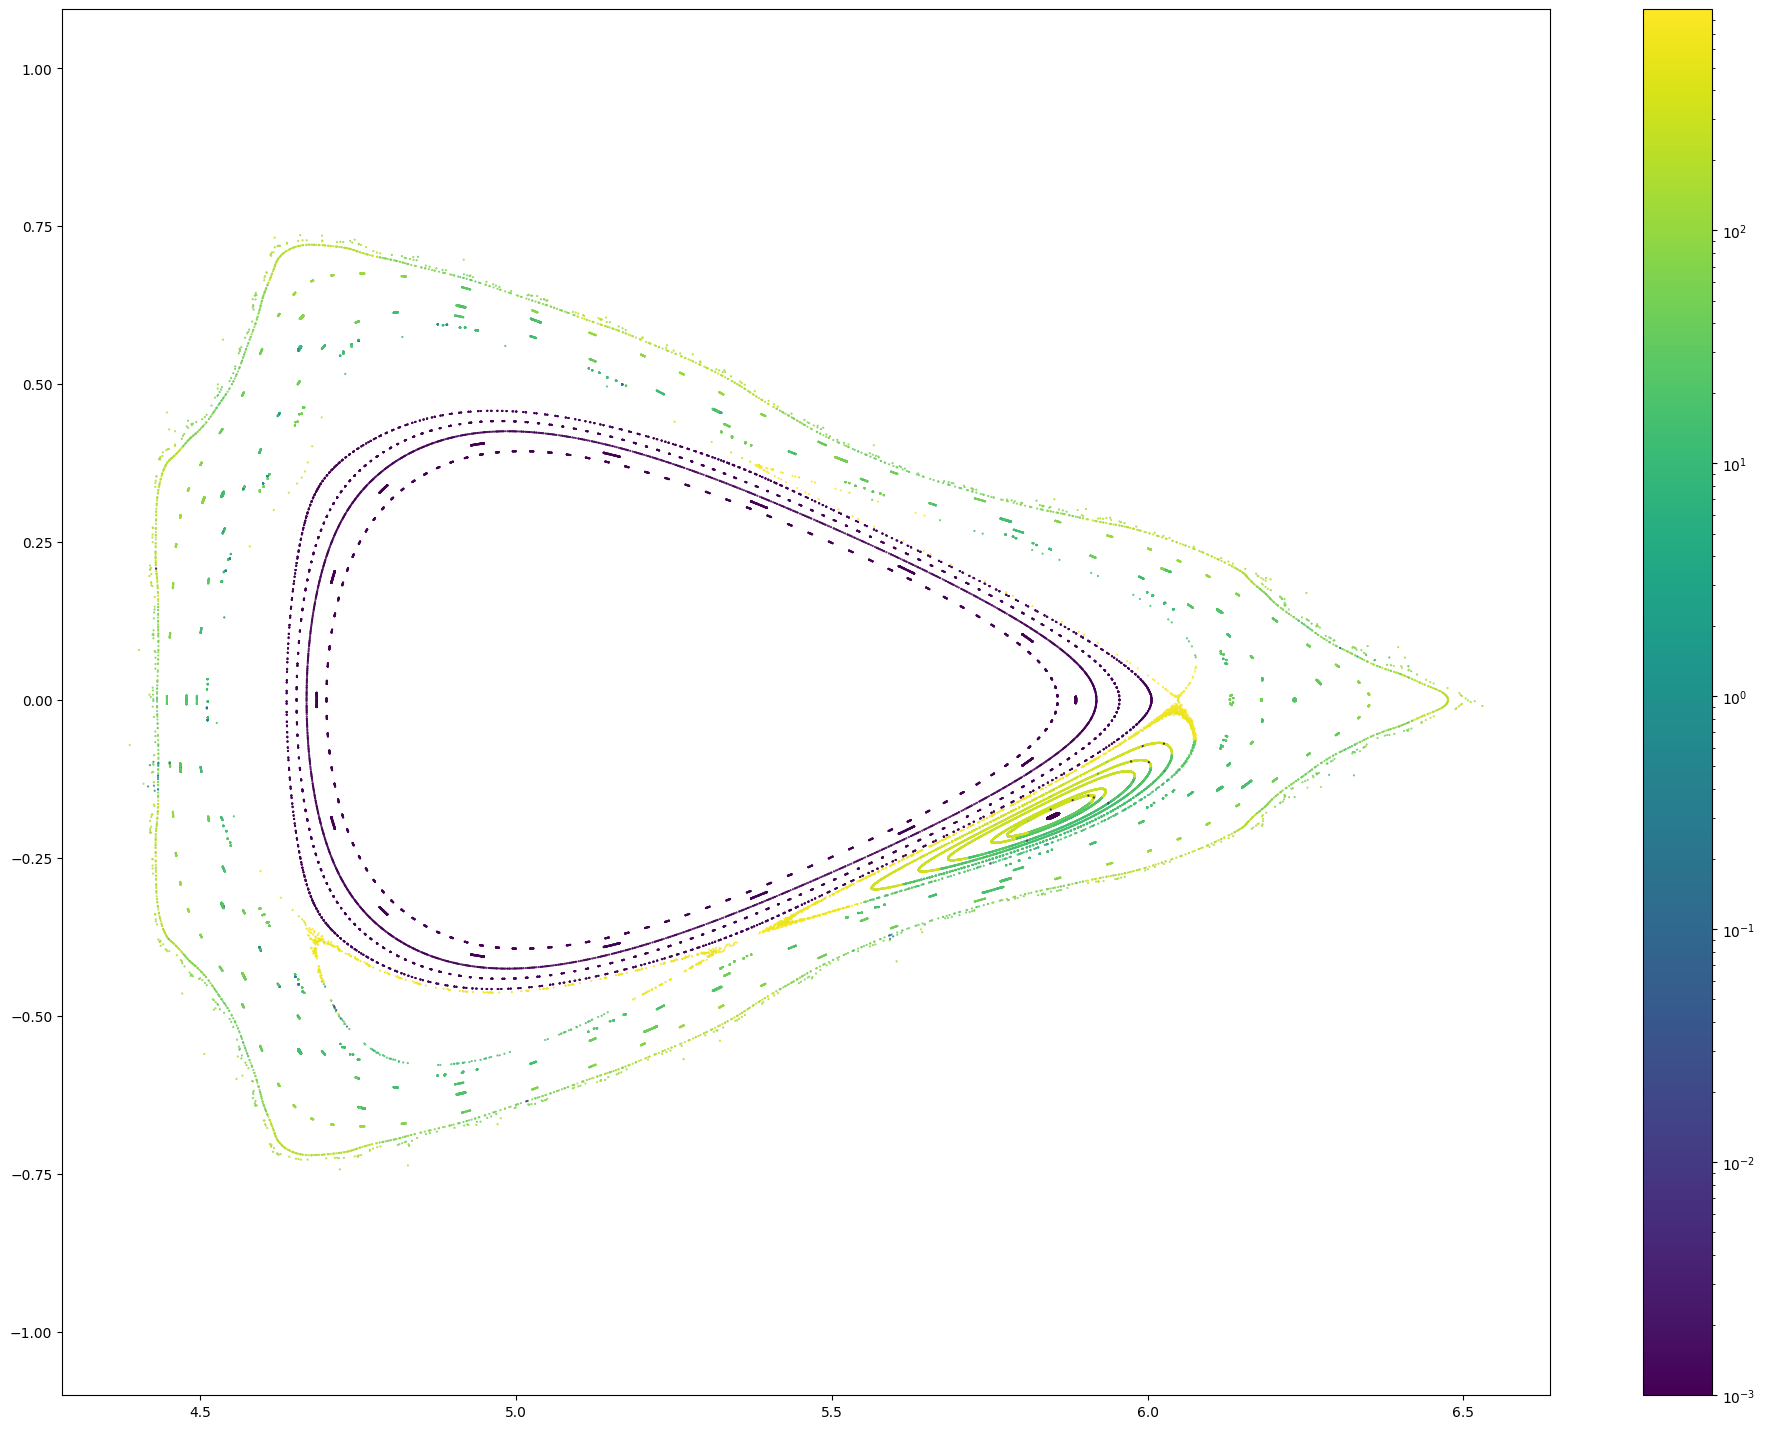

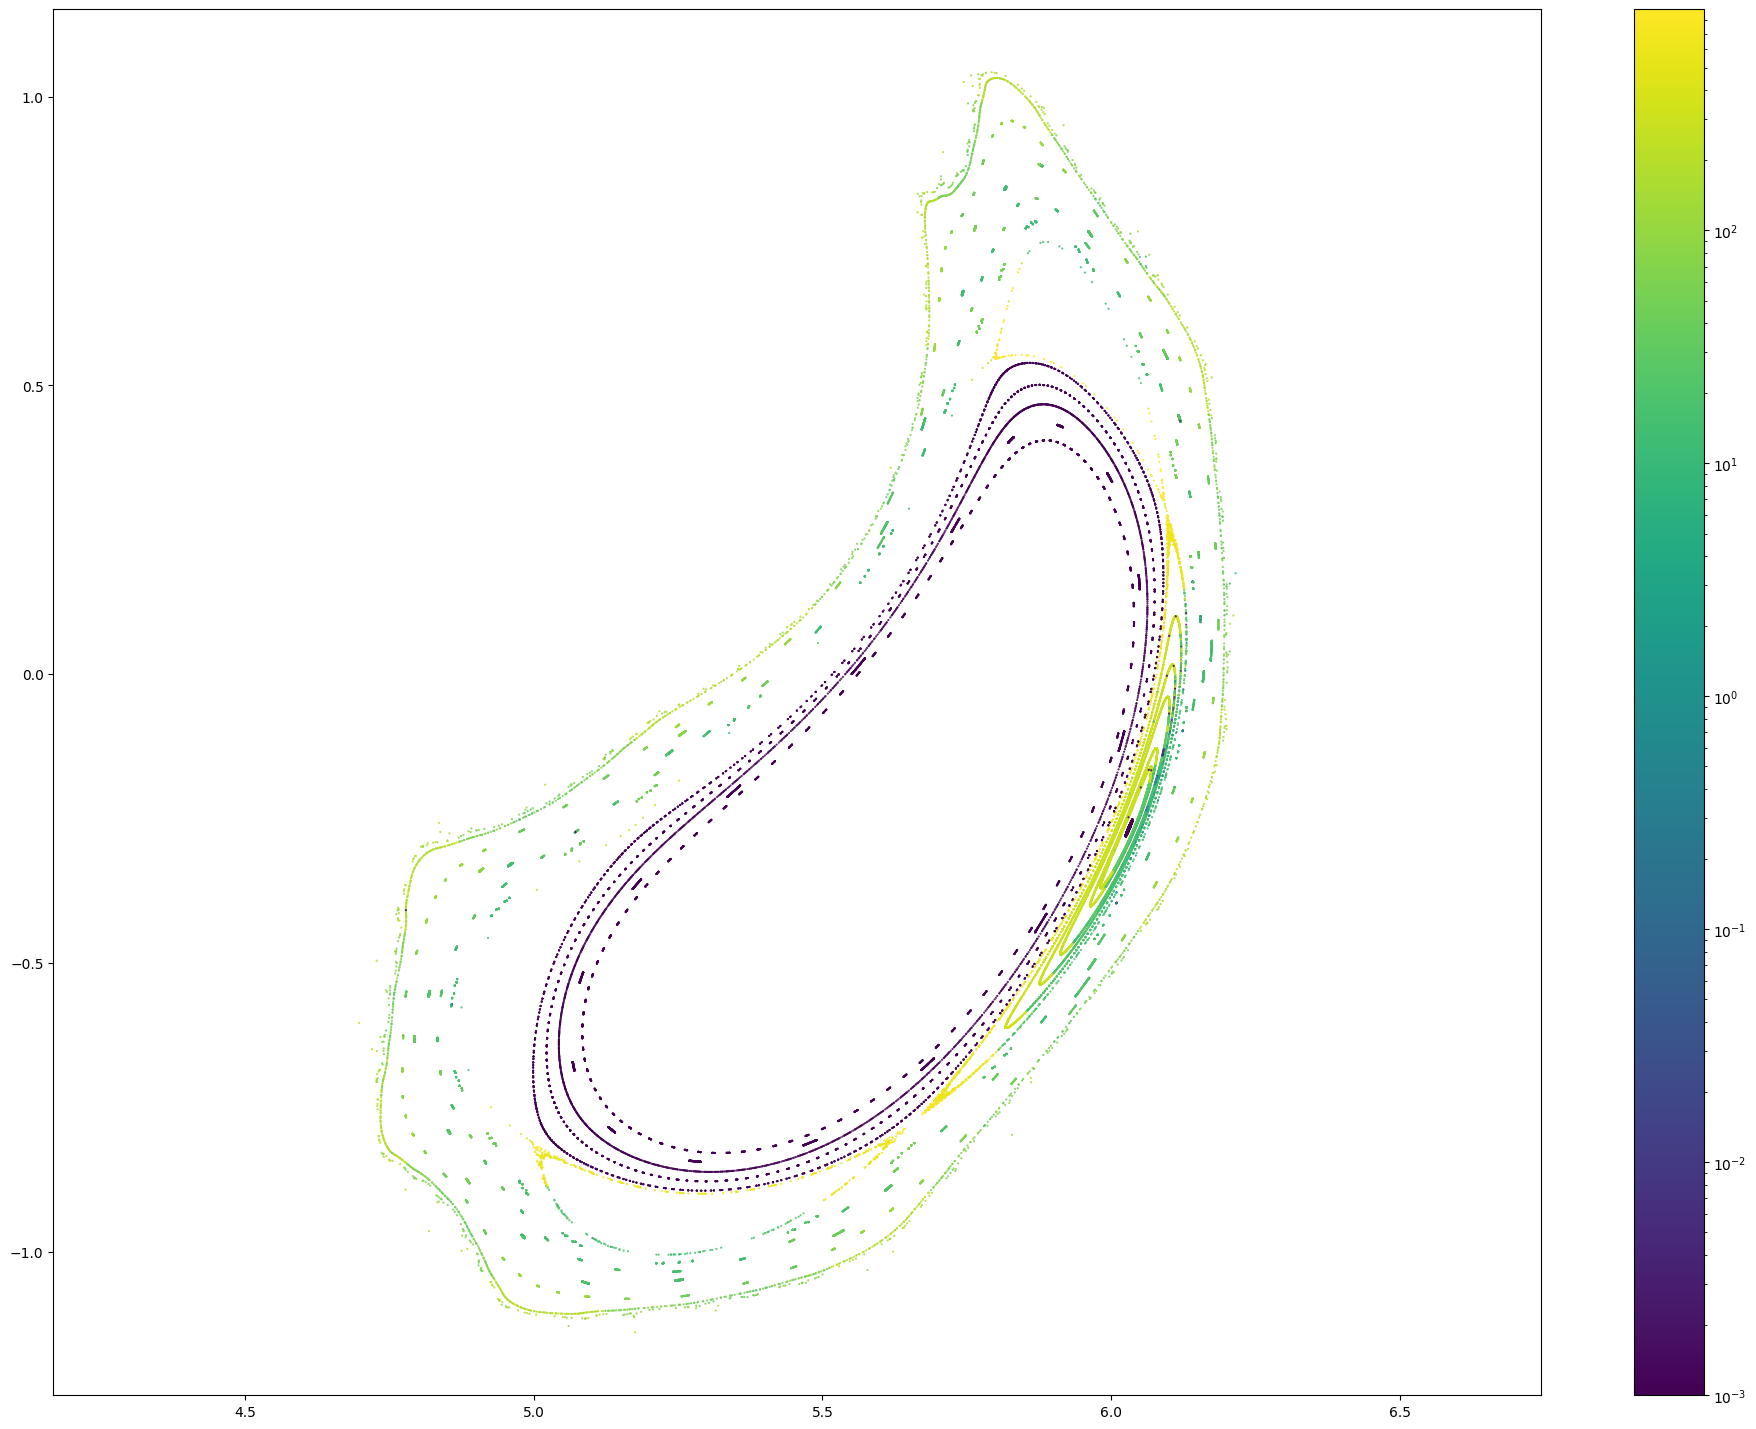

In [13]:
from matplotlib.colors import LogNorm

x, y, z, lF, lB = pc
r = np.sqrt(x**2 + y**2)

for i in range(len(x)):
    plt.figure(figsize = (24, 18))
    plt.scatter(r[i], z[i], c = np.maximum(lF + lB, 0.001)[i], marker = '.', s = 1, norm = LogNorm())
    plt.colorbar()
    plt.axis('equal')

In [1]:
import fusionsc as fsc

In [3]:
fsc.backends.activeBackend()

In [4]:
fsc.backends.alwaysUseBackend(fsc.backends.localBackend())

In [5]:
geo = fsc.devices.w7x.op21Geometry().triangulate(0.03)

In [6]:
await geo

In [ ]:
geo.asPyvista().plot()